# AFL 2 Data Mining

Nama : Steven Ongkowidjojo
NIM : 0706022110035

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
#from kneed import KneeLocator

In [2]:
df = pd.read_csv('./customer_analysis.csv',  sep='\t', index_col=0)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [4]:
# Replace column Dt_Customer to datetime column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')

In [5]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# Check missing values
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# Replace null at Income column with mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [8]:
# Drop constant value (Z_Revenue & Z_CostContact)
df.drop(['Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)

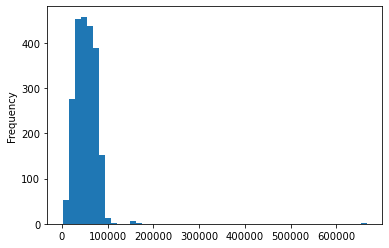

In [9]:
df['Income'].plot(kind='hist', bins=50)
plt.show()

In [10]:
# Drop outliers
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) |(df['Income'] > (Q3 + 1.5 * IQR)))]
df['Income'].describe()

count      2232.000000
mean      51640.236126
std       20601.760369
min        1730.000000
25%       35434.750000
50%       51566.000000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64

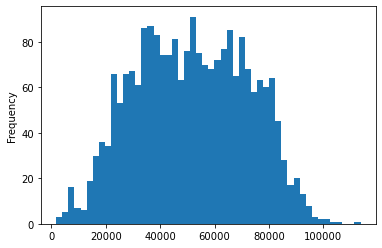

In [11]:
# Visualisation
df['Income'].plot(kind='hist', bins=50)
plt.show()

In [12]:
# Dechipering Age column
current_year = pd.to_datetime('today').year

df['Age'] = current_year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

In [13]:
# Describe Age column
df['Age'].describe()

count    2232.000000
mean       54.207437
std        11.990340
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [14]:
# Combine "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds" and make new column called "Spent"
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [15]:
# Describe Spent column
df['Spent'].describe()

count    2232.000000
mean      605.596326
std       601.444172
min         5.000000
25%        69.000000
50%       396.500000
75%      1044.250000
max      2525.000000
Name: Spent, dtype: float64

In [16]:
# Combine "Kidhome" and "Teenhome" if there are kids in the house set the value to 1, otherwise 0. Then make new column called "Parent"
df['isParent'] = (df['Kidhome'] + df['Teenhome']).apply(lambda x: 1 if x > 0 else 0)

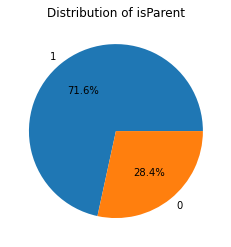

In [17]:
# Calculate the counts of each unique value in the "Parent" column
counts = df['isParent'].value_counts()

# Visualisation
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of isParent')
plt.show()

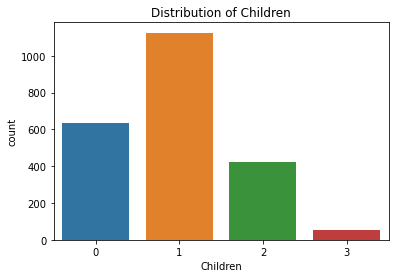

In [18]:
# Combine "Kidhome" and "Teenhome" then make new column called "Children"
df['Children'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

# Visualisation
sns.countplot(x='Children', data=df)
plt.title('Distribution of Children')
plt.show()

In [19]:
df['Marital_Status'].value_counts()

Married     861
Together    576
Single      480
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [20]:
# Combine "Marital_Status" and "totalChildren" if the customer is married then it is 2, otherwise 1. Then make new column called "famSize"
marital_mapping = {
    "Married": 2,
    "Together": 2,
    "Divorced": 1,
    "Single": 1,
    "Widow": 1,
    "Alone": 1,
    "Absurd": 1,
    "YOLO": 1
}

df['famSize'] = df['Marital_Status'].map(marital_mapping) + df['Children']

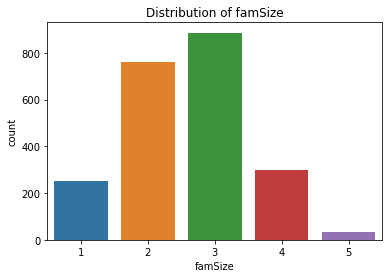

In [21]:
# VIsualisation
sns.countplot(x='famSize', data=df)
plt.title('Distribution of famSize')
plt.show()

In [22]:
# Extract the date, month, and year column
df['EnrollDate'] = df['Dt_Customer'].dt.day
df['EnrollMonth'] = df['Dt_Customer'].dt.month
df['EnrollYear'] = df['Dt_Customer'].dt.year
df.drop('Dt_Customer', axis=1, inplace=True)

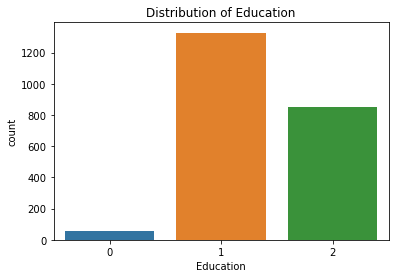

In [23]:
# Encode "Education" column
education_mapping = {
    "Basic": 0,
    "2n Cycle": 1,
    "Graduation": 1,
    "Master": 2,
    "PhD": 2
}
df['Education'] = df['Education'].map(education_mapping)

# Visualisation
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education')
plt.show()

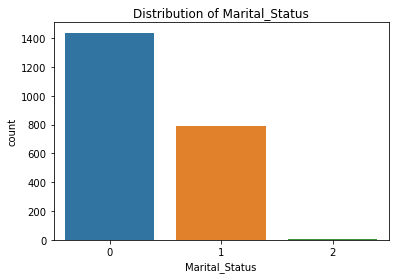

In [24]:
# Encode "Marital_Status" column
marital_mapping = {
    "Married": 0,
    "Together": 0,
    "Divorced": 1,
    "Single": 1,
    "Widow": 1,
    "Alone": 2,
    "Absurd": 2,
    "YOLO": 2
}
df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)

# Visualisation
sns.countplot(x='Marital_Status', data=df)
plt.title('Distribution of Marital_Status')
plt.show()

In [25]:
# Create StandartScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
scaled_df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Spent,isParent,Children,famSize,EnrollDate,EnrollMonth,EnrollYear
ID,,,,,,,,,,,,,,,,,,,,,
5524,-0.677287,1.317478,0.315469,0.307081,0.980281,1.547741,1.735476,2.457243,1.472657,0.839843,...,-0.097458,2.383828,0.983726,1.682002,-1.587610,-1.266161,-1.759248,-1.329084,0.724679,-1.501146
2174,-0.677287,1.317478,-0.257134,-0.383851,-0.872949,-0.637496,-0.726318,-0.651911,-0.633057,-0.731254,...,-0.097458,-0.419493,1.233983,-0.962227,0.629878,1.394923,0.446111,-0.873100,-0.994829,1.420003
4141,-0.677287,-0.738893,0.969686,-0.798410,0.359568,0.568152,-0.174694,1.341605,-0.148984,-0.041504,...,-0.097458,-0.419493,0.316372,0.283388,-1.587610,-1.266161,-0.656569,0.608846,0.438095,-0.040572
6182,-0.677287,-0.738893,-1.213481,-0.798410,-0.872949,-0.562143,-0.662493,-0.505598,-0.584649,-0.750414,...,-0.097458,-0.419493,-1.268592,-0.918988,0.629878,0.064381,0.446111,-0.645108,-1.281414,1.420003
5324,1.219456,-0.738893,0.322994,1.550759,-0.391822,0.417446,-0.215724,0.152811,-0.003763,-0.558817,...,-0.097458,-0.419493,-1.018334,-0.305328,0.629878,0.064381,0.446111,0.380855,-1.567998,1.420003


In [26]:
silhouette_scores = []

for i in range(2, 11):  # starts from 2 because silhouette_score needs at least 2 clusters
    model = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    labels = model.fit_predict(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, labels))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

TypeError: __init__() got an unexpected keyword argument 'metric'

In [ ]:
clusters_range = range(2, 11)

knee_locator = KneeLocator(clusters_range, silhouette_scores, curve='convex', direction='decreasing')

print("The optimal number of clusters is:", knee_locator.elbow)

model = AgglomerativeClustering(n_clusters=knee_locator.elbow, metric='euclidean', linkage='ward')
labels = model.fit_predict(scaled_df)
df['Cluster'] = labels
df.head()

In [ ]:
df.groupby('Cluster').agg(count=('Cluster', 'count'), 
                          Income=('Income', 'mean'),
                          MntWines=('MntWines', 'mean'),
                          MntFruits=('MntFruits', 'mean'),
                          MntMeatProducts=('MntMeatProducts', 'mean'),
                          MntFishProducts=('MntFishProducts', 'mean'),
                          NumDealsPurchases=('NumDealsPurchases', 'mean'),
                          NumWebPurchases=('NumWebPurchases', 'mean'),
                          NumCatalogPurchases=('NumCatalogPurchases', 'mean'),
                          NumStorePurchases=('NumStorePurchases', 'mean'),
                          NumWebVisitsMonth=('NumWebVisitsMonth', 'mean'),
                          Age=('Age', 'mean'),
                          TotalSpent=('Spent', 'mean'), 
                          isParent=('Parent', 'mean'),
                          TotalChildren=('Children', 'mean'),
                          FamilySize=('famSize', 'mean'),
                          EnrollYear=('EnrollYear', 'mean'),
                          )

In [ ]:
g = sns.pairplot(df[['Cluster', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']], hue='Cluster', palette='Set1', height=1.5)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

In [ ]:
g = sns.pairplot(df[['Cluster', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Spent', 'Income']], hue='Cluster', palette='Set1', height=1.5)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

In [ ]:
g = sns.pairplot(df[['Cluster', 'Education', 'Age', 'famSize', 'Parent', 'Spent', 'Income']], hue='Cluster', palette='Set1', height=1.5)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

In [ ]:
# Visualisation of clusters distribution
sns.countplot(x='Cluster', data=df, palette='Set1')
plt.show()

In [ ]:
# Describing Spent and Income
df.groupby('Cluster')[['Spent', 'Income']].describe().transpose()

In [ ]:
# Visualisation for "Family" column with "Spent" column
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(x='Cluster', y='Spent', data=df, ax=ax[0], palette='Set1')
sns.boxplot(x='Cluster', y='famSize', data=df, ax=ax[1], palette='Set1')
plt.show()

In [ ]:
sns.scatterplot(x='TotalSpent', y='Income', hue='Cluster', data=df, palette='Set1')
plt.show()

# Conclusion

We have three clusters, and in Cluster 1, there is the highest number of customers. However, they also have the lowest average total spending and income. In contrast, Cluster 0 has the highest average total spending and income but the smallest family size. This suggests a relationship between family size and total spending, where larger families tend to spend less, and vice versa.